In [1]:
import altair as alt
import pandas as pd

"""
In order to rander the images in IPython, type these in terminal:

pip install jupyter pandas vega
pip install --upgrade notebook
jupyter nbextension install --sys-prefix --py vega
jupyter nbextension enable --sys-prefix --py vega

Using conda will be easier:
conda install vega --channel conda-forge

https://github.com/vega/ipyvega
https://github.com/altair-viz/altair
"""

# downloda the data here: https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/
# reference: https://www.analyticsvidhya.com/blog/2017/12/introduction-to-altair-a-declarative-visualization-in-python/?utm_source=feedburner&utm_medium=email&utm_campaign=Feed%3A+AnalyticsVidhya+%28Analytics+Vidhya%29

In [2]:
df = pd.read_csv('Big_Mart_train.csv', nrows=410)  # maximum allowed rows is 5000, here I'm choosing 410 rows
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 12 columns):
Item_Identifier              410 non-null object
Item_Weight                  329 non-null float64
Item_Fat_Content             410 non-null object
Item_Visibility              410 non-null float64
Item_Type                    410 non-null object
Item_MRP                     410 non-null float64
Outlet_Identifier            410 non-null object
Outlet_Establishment_Year    410 non-null int64
Outlet_Size                  293 non-null object
Outlet_Location_Type         410 non-null object
Outlet_Type                  410 non-null object
Item_Outlet_Sales            410 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 38.5+ KB


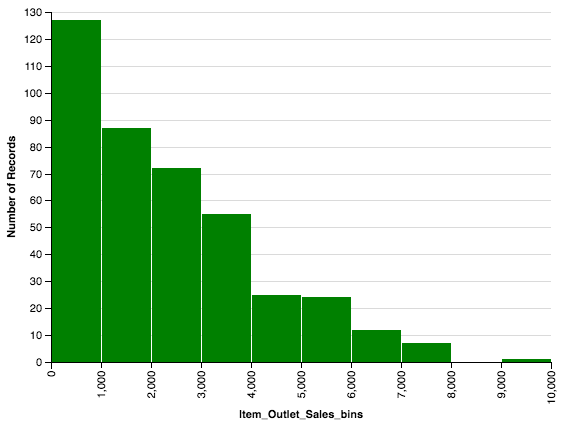

In [9]:
# barchart
## Chart() reads data; mark_ functions decide which chart to show, such as bar chart, scatter plot, etc
## bin=True means binning the continuous data
## Q means set count() result as quantitative; N means nominal; O means ordinal

alt.Chart(df).mark_bar(color='green').encode(
 alt.X('Item_Outlet_Sales',bin=True, axis= alt.Axis(title='Item_Outlet_Sales_bins')),
 alt.Y('count(*):Q'),
)

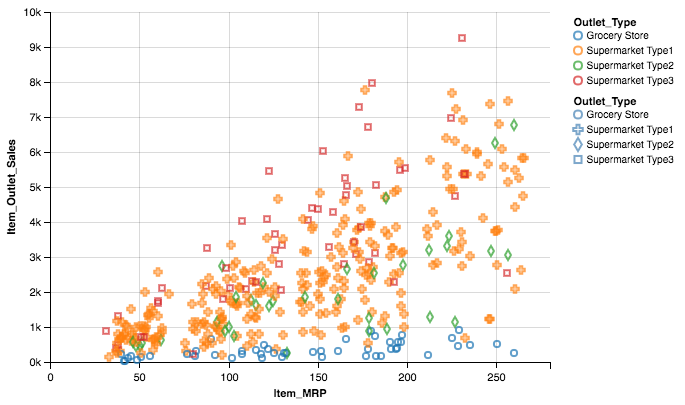

In [11]:
# scatter plot

alt.Chart(df).mark_point().encode(
    x='Item_MRP',
    y='Item_Outlet_Sales',
    color='Outlet_Type',   # color is discrete value
    shape = 'Outlet_Type'
)

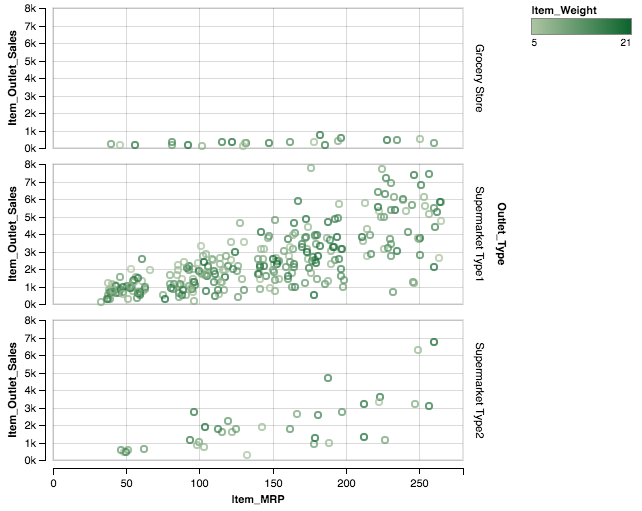

In [17]:
alt.Chart(df).mark_point().encode(
 x='Item_MRP',
 y='Item_Outlet_Sales',
 color='Item_Weight',   # color is continuous value
 row='Outlet_Type'    # seperate into multiple charts
).configure_cell(width=410, height=140)

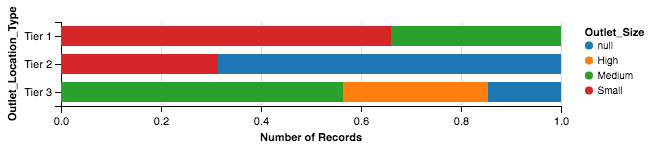

In [27]:
# stacked bar chart

alt.Chart(df).mark_bar(stacked='normalize').encode(
 alt.Y('Outlet_Location_Type'),
 alt.X('count(*):Q'),
 alt.Color('Outlet_Size:N', sort='descending')  # this means sort the color based on the text of Outlet_Size
)

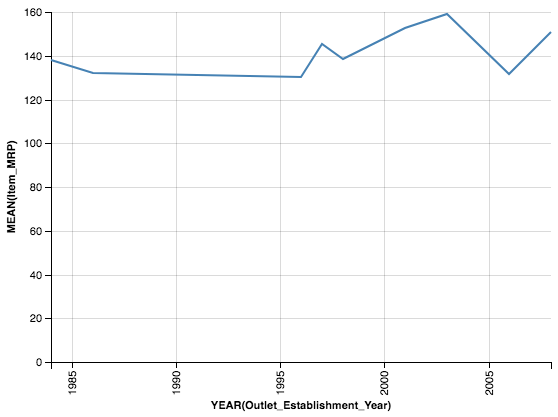

In [20]:
# line chart

alt.Chart(df).mark_line().encode(
 alt.X('Outlet_Establishment_Year:T', timeUnit='year'),  # set data type to temporal
 alt.Y('Item_MRP:Q', aggregate='mean'),
)

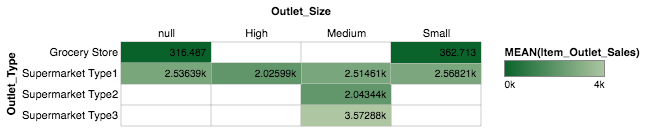

In [24]:
# heatmap

alt.Chart(df).mark_text(applyColorToBackground=True).encode(
 alt.Row('Outlet_Type:N'),
 alt.Column('Outlet_Size:N'),
 alt.Color('mean(Item_Outlet_Sales):Q', sort='descending'),  # this means sort the color based on the value of mean(Item_Outlet_Sales)
 alt.Text('mean(Item_Outlet_Sales)')
)